In [1]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

C:\Users\디노플러스\AppData\Roaming\Python\Python39\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] 지정된 프로시저를 찾을 수 없습니다
  warn(f"Failed to load image Python extension: {e}")


In [2]:
IMAGE_PATH = './data/images/construction_contract.jpg'

In [17]:
reader = easyocr.Reader(['ko'], gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[731, 239], [1145, 239], [1145, 301], [731, 301]],
  '공 사 시 공 계 약 서',
  0.5931534793283761),
 ([[869, 317], [1005, 317], [1005, 355], [869, 355]],
  '(자동문)',
  0.9998240685237282),
 ([[522, 344], [578, 344], [578, 368], [522, 368]],
  '의회인',
  0.32772344651601965),
 ([[506, 376], [530, 376], [530, 402], [506, 402]], '성', 0.9999847412691452),
 ([[559, 377], [577, 377], [577, 401], [559, 401]], '명', 0.9991253143764176),
 ([[838, 376], [1022, 376], [1022, 402], [838, 402]],
  '사업자번호 또는 주민번호',
  0.798337490929246),
 ([[506, 410], [548, 410], [548, 434], [506, 434]], '주', 0.999999046325911),
 ([[554, 410], [580, 410], [580, 434], [554, 434]], '소', 0.9999980926522767),
 ([[508, 444], [580, 444], [580, 468], [508, 468]], '연락 처', 0.913328913004371),
 ([[488, 492], [578, 492], [578, 520], [488, 520]],
  '올) 시공사',
  0.5740409224403831),
 ([[528, 526], [554, 526], [554, 550], [528, 550]], '성', 0.9999730588820199),
 ([[575, 527], [595, 527], [595, 549], [575, 549]], '명', 0.9996689832004826),
 (

In [4]:
print(len(result))
print(type(result))

result[0]

87
<class 'list'>


([[731, 239], [1145, 239], [1145, 301], [731, 301]],
 '공 사 시 공 계 약 서',
 0.5931534793283761)

In [7]:
location_result = np.array(result)

location_result[1][0]

C:\Users\디노플~1\AppData\Local\Temp/ipykernel_18828/3927394952.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  location_result = np.array(result)


[[869, 317], [1005, 317], [1005, 355], [869, 355]]

[[731, 239], [1145, 239], [1145, 301], [731, 301]] 공 사 시 공 계 약 서
[[869, 317], [1005, 317], [1005, 355], [869, 355]] (자동문)
[[522, 344], [578, 344], [578, 368], [522, 368]] 의회인
[[506, 376], [530, 376], [530, 402], [506, 402]] 성
[[559, 377], [577, 377], [577, 401], [559, 401]] 명
[[838, 376], [1022, 376], [1022, 402], [838, 402]] 사업자번호 또는 주민번호
[[506, 410], [548, 410], [548, 434], [506, 434]] 주
[[554, 410], [580, 410], [580, 434], [554, 434]] 소
[[508, 444], [580, 444], [580, 468], [508, 468]] 연락 처
[[488, 492], [578, 492], [578, 520], [488, 520]] 올) 시공사


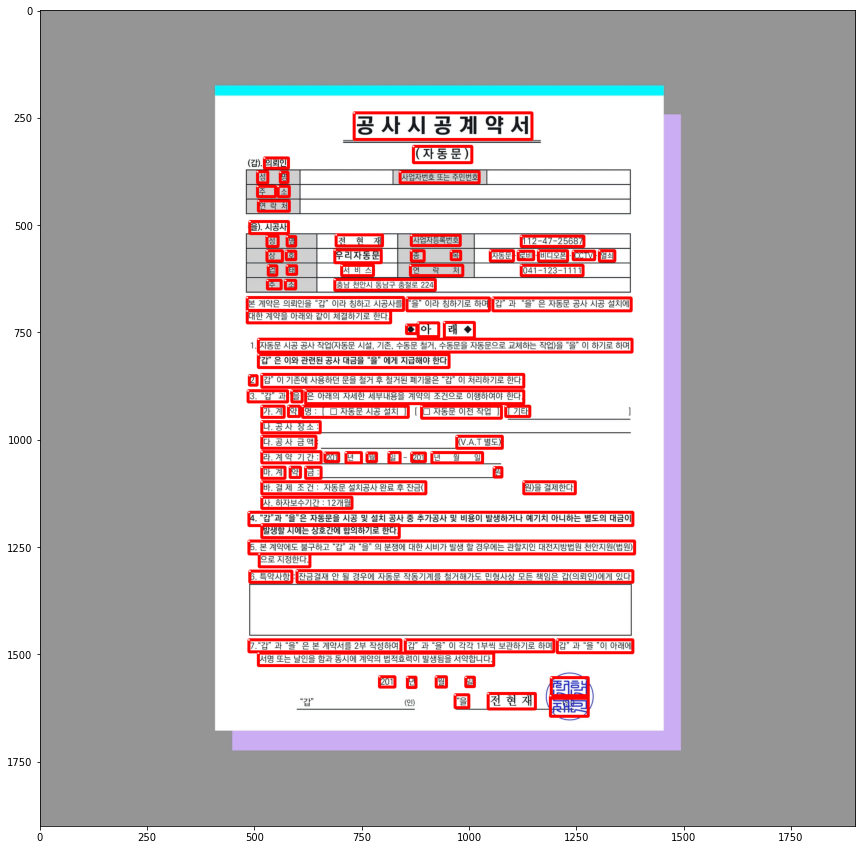

In [18]:
img = cv2.imread(IMAGE_PATH)

for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (255,0,0) , 5)
    img = cv2.putText(img, text, top_left, font, None , (255,255,255), 2 , cv2.LINE_AA)
    
    

for x in range(10):
    print(location_result[x][0],location_result[x][1])


plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()